In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,GRU
# from keras.optimizers import SGD# 随机梯度下降法

In [18]:
dataset = pd.read_excel(r'C:\Users\17180\Desktop\Code\Study-Cave\磨损量数据.xlsx')

In [19]:
dataset

,Unnamed: 0,磨损量
0,0,0.512844
1,1,0.550252
2,2,0.589667
3,3,0.631161
4,4,0.674803
...,...,...
747,747,14.351904
748,748,14.874014
749,749,15.410223
750,750,15.960784


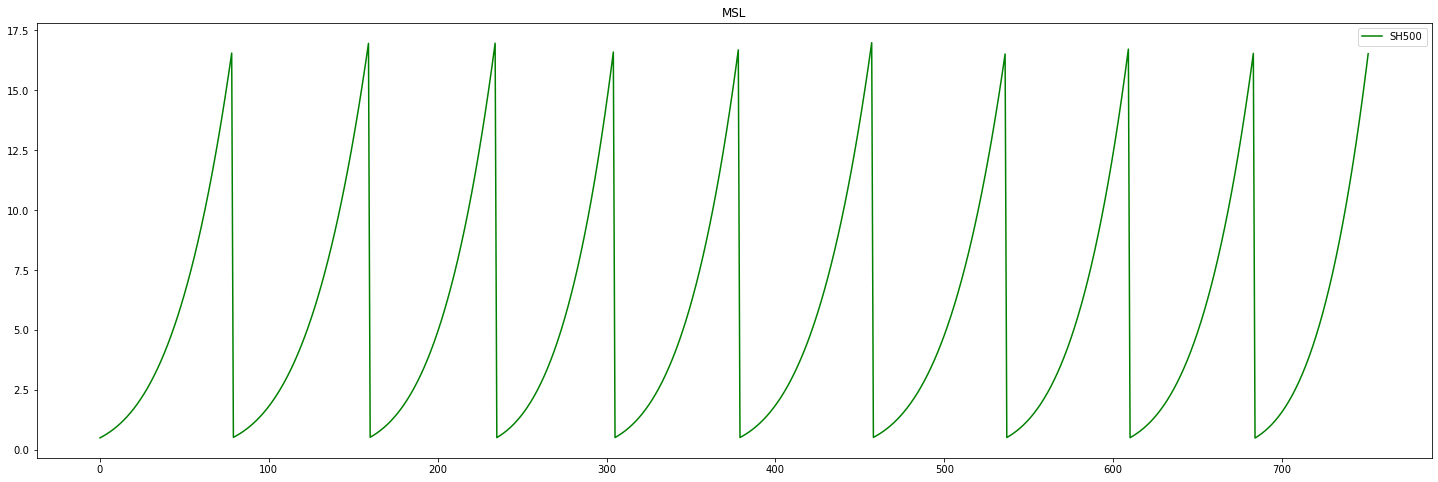

In [21]:
dataset["磨损量"].plot(figsize=[25,8], legend=True,color='g')
plt.title('MSL')
plt.legend(["SH500"])
plt.show()

In [22]:
train_set = dataset[:500].iloc[:,1:2]
test_set = dataset[500:].iloc[:,1:2]

In [23]:
test_set.shape

(252, 1)

In [24]:
sc = MinMaxScaler(feature_range=[0,1])# 最大最小值归一化
train_set_scaled = sc.fit_transform(train_set)
#train_set_scaled = train_set
print(train_set_scaled.shape)
train_set_scaled

(500, 1)


array([[0.00000000e+00],
       [2.27112942e-03],
       [4.66413400e-03],
       [7.18329226e-03],
       [9.83295646e-03],
       [1.26175526e-02],
       [1.55415803e-02],
       [1.86096131e-02],
       [2.18262981e-02],
       [2.51963562e-02],
       [2.87245819e-02],
       [3.24158436e-02],
       [3.62750833e-02],
       [4.03073168e-02],
       [4.45176336e-02],
       [4.89111969e-02],
       [5.34932436e-02],
       [5.82690843e-02],
       [6.32441036e-02],
       [6.84237593e-02],
       [7.38135835e-02],
       [7.94191816e-02],
       [8.52462329e-02],
       [9.13004905e-02],
       [9.75877809e-02],
       [1.04114005e-01],
       [1.10885136e-01],
       [1.17907223e-01],
       [1.25186387e-01],
       [1.32728823e-01],
       [1.40540800e-01],
       [1.48628662e-01],
       [1.56998825e-01],
       [1.65657778e-01],
       [1.74612086e-01],
       [1.83868387e-01],
       [1.93433392e-01],
       [2.03313886e-01],
       [2.13516728e-01],
       [2.24048850e-01],


In [25]:
x_train = []
y_train = []
for i in range(30, 500):
    x_train.append(train_set_scaled[i-30:i,0])
    y_train.append(train_set_scaled[i,0])
         
x_train, y_train = np.array(x_train), np.array(y_train)

In [26]:
x_train.shape

(470, 30)

In [27]:
print(y_train)
x_train[0:2]

[1.40540800e-01 1.48628662e-01 1.56998825e-01 1.65657778e-01
 1.74612086e-01 1.83868387e-01 1.93433392e-01 2.03313886e-01
 2.13516728e-01 2.24048850e-01 2.34917259e-01 2.46129035e-01
 2.57691331e-01 2.69611376e-01 2.81896469e-01 2.94553987e-01
 3.07591377e-01 3.21016163e-01 3.34835939e-01 3.49058376e-01
 3.63691218e-01 3.78742282e-01 3.94219458e-01 4.10130712e-01
 4.26484081e-01 4.43287678e-01 4.60549689e-01 4.78278373e-01
 4.96482064e-01 5.15169169e-01 5.34348168e-01 5.54027616e-01
 5.74216141e-01 5.94922445e-01 6.16155303e-01 6.37923566e-01
 6.60236156e-01 6.83102070e-01 7.06530378e-01 7.30530225e-01
 7.55110829e-01 7.80281481e-01 8.06051547e-01 8.32430466e-01
 8.59427751e-01 8.87052988e-01 9.15315839e-01 9.44226036e-01
 9.73793387e-01 1.25388127e-03 3.53981042e-03 5.94452170e-03
 8.47205595e-03 1.11265215e-02 1.39120944e-02 1.68330179e-02
 1.98936030e-02 2.30982281e-02 2.64513393e-02 2.99574499e-02
 3.36211412e-02 3.74470615e-02 4.14399270e-02 4.56045212e-02
 4.99456952e-02 5.446836

array([[0.        , 0.00227113, 0.00466413, 0.00718329, 0.00983296,
        0.01261755, 0.01554158, 0.01860961, 0.0218263 , 0.02519636,
        0.02872458, 0.03241584, 0.03627508, 0.04030732, 0.04451763,
        0.0489112 , 0.05349324, 0.05826908, 0.0632441 , 0.06842376,
        0.07381358, 0.07941918, 0.08524623, 0.09130049, 0.09758778,
        0.104114  , 0.11088514, 0.11790722, 0.12518639, 0.13272882],
       [0.00227113, 0.00466413, 0.00718329, 0.00983296, 0.01261755,
        0.01554158, 0.01860961, 0.0218263 , 0.02519636, 0.02872458,
        0.03241584, 0.03627508, 0.04030732, 0.04451763, 0.0489112 ,
        0.05349324, 0.05826908, 0.0632441 , 0.06842376, 0.07381358,
        0.07941918, 0.08524623, 0.09130049, 0.09758778, 0.104114  ,
        0.11088514, 0.11790722, 0.12518639, 0.13272882, 0.1405408 ]])

In [28]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [12]:
x_train

array([[[0.        ],
        [0.00227113],
        [0.00466413],
        ...,
        [0.11790722],
        [0.12518639],
        [0.13272882]],

       [[0.00227113],
        [0.00466413],
        [0.00718329],
        ...,
        [0.12518639],
        [0.13272882],
        [0.1405408 ]],

       [[0.00466413],
        [0.00718329],
        [0.00983296],
        ...,
        [0.13272882],
        [0.1405408 ],
        [0.14862866]],

       ...,

       [[0.02672712],
        [0.03029863],
        [0.03403283],
        ...,
        [0.19574011],
        [0.20562025],
        [0.21581948]],

       [[0.03029863],
        [0.03403283],
        [0.03793458],
        ...,
        [0.20562025],
        [0.21581948],
        [0.22634459]],

       [[0.03403283],
        [0.03793458],
        [0.04200881],
        ...,
        [0.21581948],
        [0.22634459],
        [0.23720245]]])

In [13]:
model = Sequential()
#LSTM 第一层
model.add(LSTM(128,return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# 第二层
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))

#第三层
model.add(LSTM(128))
model.add(Dropout(0.2))

# Dense层
model.add(Dense(units=1))
y_train
# 模型编译
model.compile(optimizer='adadelta',loss='mse')

# 训练模型
model.fit(x_train, y_train, epochs=40, batch_size=72)

Epoch 1/40
7/7 [==============================] - 19s 50ms/step - loss: 0.1909
Epoch 2/40
7/7 [==============================] - 0s 47ms/step - loss: 0.1829
Epoch 3/40
7/7 [==============================] - 0s 49ms/step - loss: 0.1804
Epoch 4/40
7/7 [==============================] - 0s 49ms/step - loss: 0.1758
Epoch 5/40
7/7 [==============================] - 0s 49ms/step - loss: 0.1859
Epoch 6/40
7/7 [==============================] - 0s 49ms/step - loss: 0.1930
Epoch 7/40
7/7 [==============================] - 0s 49ms/step - loss: 0.1794
Epoch 8/40
7/7 [==============================] - 0s 49ms/step - loss: 0.1808
Epoch 9/40
7/7 [==============================] - 0s 50ms/step - loss: 0.1817
Epoch 10/40
7/7 [==============================] - 0s 50ms/step - loss: 0.1915
Epoch 11/40
7/7 [==============================] - 0s 50ms/step - loss: 0.1774
Epoch 12/40
7/7 [==============================] - 0s 49ms/step - loss: 0.1790
Epoch 13/40
7/7 [==============================] - 0s 50ms/s

In [33]:
dataset_total = dataset["磨损量"]
# 获取输入数据
inputs = dataset_total[len(dataset_total)-len(test_set) - 30:].values
dataset_total

0       0.512844
1       0.550252
2       0.589667
3       0.631161
4       0.674803
         ...    
747    14.351904
748    14.874014
749    15.410223
750    15.960784
751    16.525949
Name: 磨损量, Length: 752, dtype: float64

In [34]:
dataset_total

0       0.512844
1       0.550252
2       0.589667
3       0.631161
4       0.674803
         ...    
747    14.351904
748    14.874014
749    15.410223
750    15.960784
751    16.525949
Name: 磨损量, Length: 752, dtype: float64

In [35]:
inputs

array([ 1.13766725,  1.20477422,  1.27480464,  1.34784215,  1.42397154,
        1.50327881,  1.58585112,  1.6717768 ,  1.76114539,  1.85404758,
        1.95057524,  2.05082143,  2.1548804 ,  2.26284754,  2.37481945,
        2.4908939 ,  2.61116984,  2.73574739,  2.86472786,  2.99821373,
        3.13630867,  3.27911751,  3.42674627,  3.57930215,  3.73689352,
        3.89962994,  4.06762214,  4.24098203,  4.41982271,  4.60425842,
        4.79440464,  4.99037796,  5.19229621,  5.40027836,  5.61444457,
        5.83491618,  6.06181571,  6.29526684,  6.53539446,  6.78232461,
        7.03618453,  7.29710263,  7.56520848,  7.84063286,  8.12350771,
        8.41396616,  8.71214249,  9.0181722 ,  9.33219194,  9.65433955,
        9.98475404, 10.3235756 , 10.67094561, 11.02700661, 11.39190233,
       11.76577768, 12.14877875, 12.5410528 , 12.94274826, 13.35401477,
       13.77500311, 14.20586527, 14.6467544 , 15.09782484, 15.5592321 ,
       16.03113286, 16.51368501,  0.52570063,  0.56710711,  0.61

In [36]:
# 归一化
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [37]:
inputs.shape

(282, 1)

In [38]:
# 准备测试集进行预测
x_test = []
for i in range(30 , 282):
    x_test.append(inputs[i-30:i,0])
    
x_test=np.array(x_test)
x_test.shape

(252, 30)

In [39]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [40]:
x_test.shape

(252, 30, 1)

In [45]:
predict_test = model.predict(x_test) # 预测

In [46]:
predict_test.shape 

(252, 1)

In [47]:
predict_stock_price = sc.inverse_transform(predict_test)

In [49]:
predict_stock_price = test_set

In [50]:
predict_stock_price

,磨损量
500,4.794405
501,4.990378
502,5.192296
503,5.400278
504,5.614445
...,...
747,14.351904
748,14.874014
749,15.410223
750,15.960784


In [51]:
def plot_predictions(test_result, predict_result):
    """
    :param test_result: 真实值测试结果
    :param predict_result: 预测值结果
    :return:
    """
    fig = plt.figure(figsize=[15, 7], dpi=200)
    ax = fig.add_axes([0.05, 0.05, 0.9, 0.9])
    ax.set_xlabel('time', fontsize='10')
    ax.set_ylabel('stock price', fontsize='10')
    #ax.plot(test_result, color='r', label='IBM True Stock Price')
    ax.plot(predict_result, color='b', label='IBM Predicted Stock Price')
    plt.legend()
    plt.show()

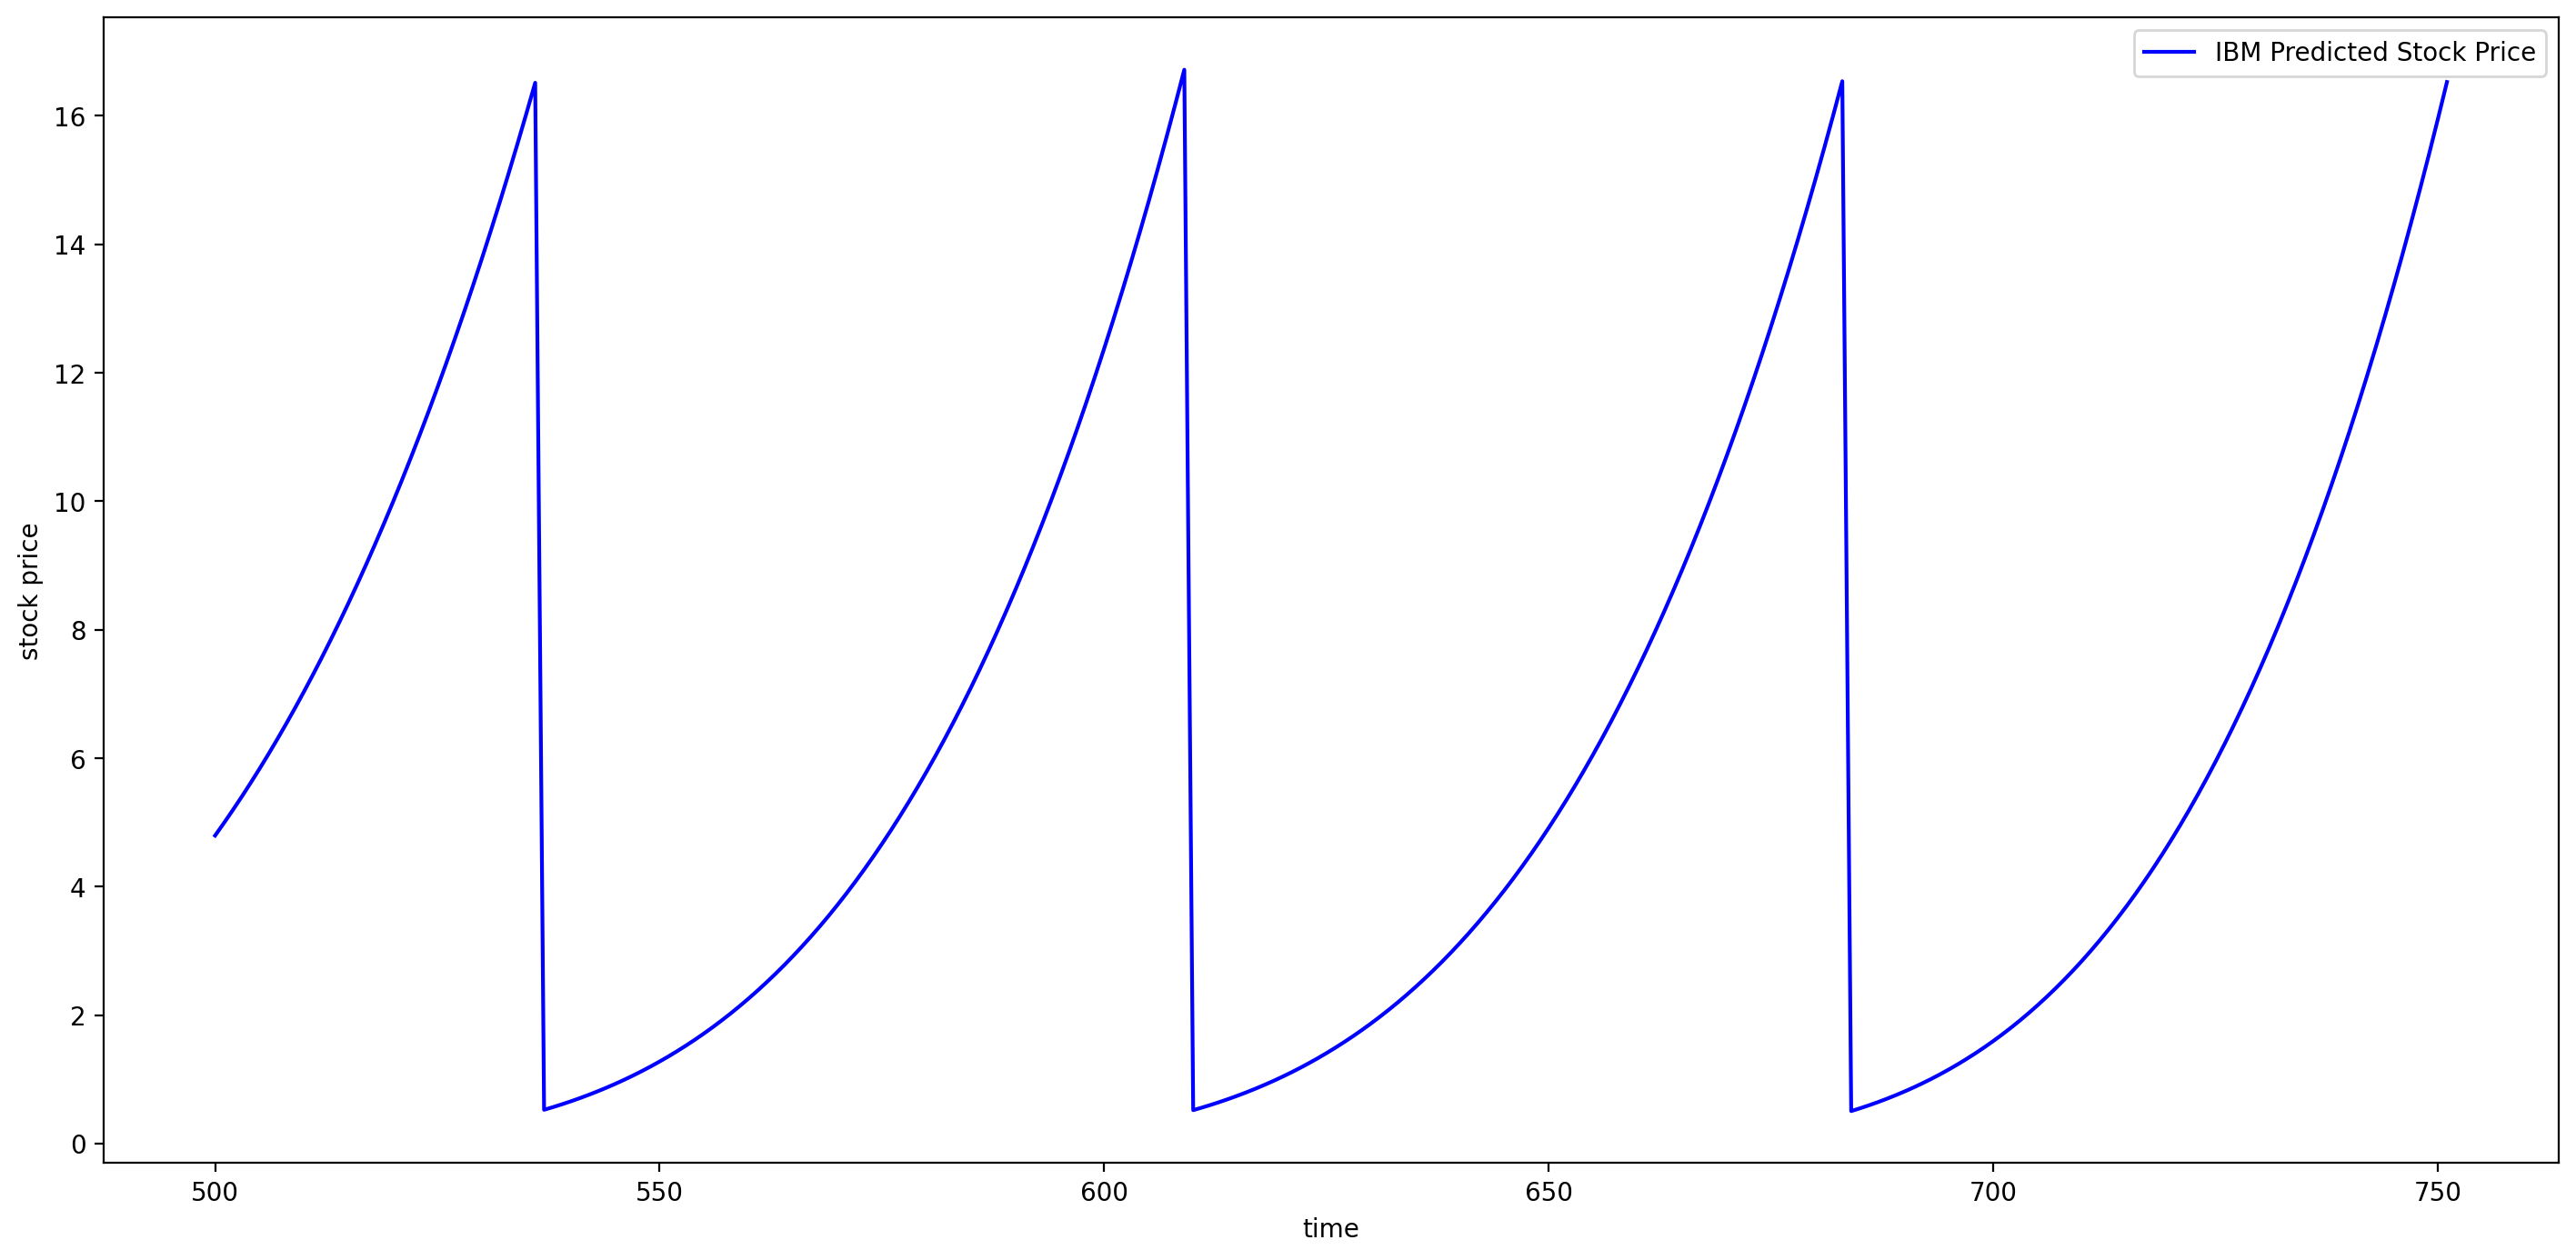

In [52]:
plot_predictions(test_set, predict_stock_price) 